In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! pip install MTCNN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 15.6 MB/s 


In [4]:
pwd


'/content'

In [5]:
from mtcnn import MTCNN
import cv2
import os, glob
import numpy as np
# from tqdm import tqdm_notebook
from tqdm.notebook import tqdm_notebook
import shutil
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import keras

In [6]:
!pip install unrar
!unrar x "/content/drive/MyDrive/Datasets/CKPLUS.rar"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/Datasets/CKPLUS.rar

Creating    CKPLUS                                                    OK
Extracting  CKPLUS/archive (1).zip                                        32%  OK 
Creating    CKPLUS/ck                                                 OK
Creating    CKPLUS/ck/CK+48                                           OK
Creating    CKPLUS/ck/CK+48/anger                                     OK
Extracting  CKPLUS/ck/CK+48/anger/S010_004_00000017.png                   32%  OK 
Extracting  CKPLUS/ck/CK+48/anger/S010_004_00000018.png                   32%  OK 
Extracting  CKPLUS/ck/CK+48/anger/S010_004_00000019.png                   32%  OK 
Extracting  CKPLUS/ck/CK+48/anger/S011_004_00000019.png                   32%  OK 
Extracting  CKPLUS/c

In [7]:
def crop_image(img, detector): 
    data=detector.detect_faces(img)
    biggest=0
    if data !=[]:
        for faces in data:
            box=faces['box']            
            area = box[3]  * box[2]
            if area>biggest:
                biggest=area
                bbox=box 
        bbox[0]= 0 if bbox[0]<0 else bbox[0]
        bbox[1]= 0 if bbox[1]<0 else bbox[1]
        img=img[bbox[1]: bbox[1]+bbox[3],bbox[0]: bbox[0]+ bbox[2]]        
        return (True, img) 
    else:
        return (False, None)

def align_crop_resize(src_list, dest_list, detector, height=None, width= None): 
    success_count=0
    for i,f in tqdm_notebook(enumerate(src_list)):
        dest_dir = os.path.dirname(dest_list[i])
        if not os.path.isdir(dest_dir):
            os.makedirs(dest_dir)
      
        if os.path.isfile(src_list[i]):
            try:
                img=cv2.imread(src_list[i]) 
                shape=img.shape
                  
                cstatus, img=crop_image(img, detector)
                if cstatus:
                    if height != None and width !=None:
                        img=cv2.resize(img, (height, width)) 

                    cv2.imwrite(dest_list[i], img) 
                    success_count +=1
            except:
                print('file ', src_list[i], ' is a bad image file')
    return success_count

detector = MTCNN()
src_list = glob.glob("/content/CKPLUS/CK+48/*/*")
dest_list = [src_list[i].replace("CKPLUS", "Cropped_CKPLUS") for i in range(len(src_list))] 

align_crop_resize(src_list, dest_list, detector, height=224, width= 224)

0it [00:00, ?it/s]

1/1 [==============================] - 0s 34ms/step


981

Training

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
# base_model = keras.applications.E(
#     weights='imagenet',  # Load weights pre-trained on ImageNet.
#     input_shape=(224, 224, 3),
#     include_top=False
# ) 

# Model

In [9]:
base_model = keras.applications.MobileNetV3Large(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False
    classes=7
) 

base_model.trainable = False

inputs = keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(7, activation="softmax")(x)

model = keras.Model(inputs, outputs)

12683000/12683000 [==============================] - 0s 0us/step


In [10]:
path="/content/Cropped_CKPLUS/CK+48"

# dataset = keras.preprocessing.image_dataset_from_directory(path, image_size=(224, 224), label_mode="categorical")
train_dataset = keras.preprocessing.image_dataset_from_directory(path, image_size=(224, 224), label_mode="categorical", validation_split=0.3, subset="training", seed=42)
valid_dataset = keras.preprocessing.image_dataset_from_directory(path, image_size=(224, 224), label_mode="categorical", validation_split=0.3, subset="validation", seed=42)

model.compile(optimizer=keras.optimizers.Adam(),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
# model.fit(dataset, epochs=20, validation_split=0.2)
history = model.fit(train_dataset, epochs=20, validation_data=valid_dataset)


Found 981 files belonging to 7 classes.
Using 687 files for training.
Found 981 files belonging to 7 classes.
Using 294 files for validation.
Epoch 1/20
22/22 [==============================] - 8s 167ms/step - loss: 1.8277 - accuracy: 0.2897 - val_loss: 1.4825 - val_accuracy: 0.4626
Epoch 2/20
22/22 [==============================] - 2s 88ms/step - loss: 1.3335 - accuracy: 0.5764 - val_loss: 1.1573 - val_accuracy: 0.6633
Epoch 3/20
22/22 [==============================] - 2s 88ms/step - loss: 1.0693 - accuracy: 0.7263 - val_loss: 0.9799 - val_accuracy: 0.7483
Epoch 4/20
22/22 [==============================] - 2s 88ms/step - loss: 0.8910 - accuracy: 0.7977 - val_loss: 0.8590 - val_accuracy: 0.7789
Epoch 5/20
22/22 [==============================] - 2s 86ms/step - loss: 0.7684 - accuracy: 0.8457 - val_loss: 0.7643 - val_accuracy: 0.7993
Epoch 6/20
22/22 [==============================] - 2s 87ms/step - loss: 0.6706 - accuracy: 0.8574 - val_loss: 0.6952 - val_accuracy: 0.8265
Epoch 7/20


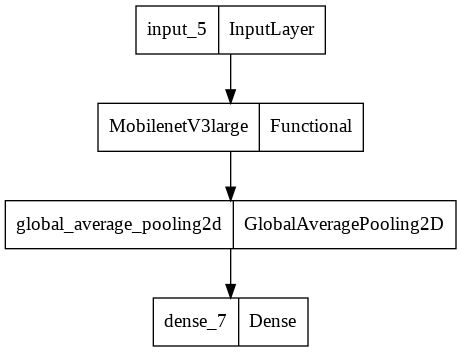

In [11]:
keras.utils.plot_model(model)
# keras.utils.plot_model(model, show_shapes=False, show_dtype=False, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96, layer_range=None, show_layer_activations=False)


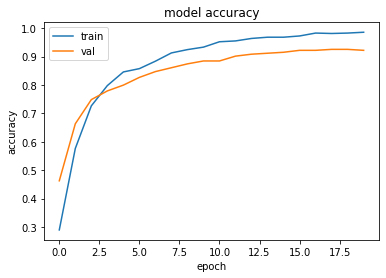

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('MobileNetV2_CKPLUS_model_accuracy.png')
!cp MobileNetV2_CKPLUS_model_accuracy.png "/content/drive/MyDrive/Datasets"
plt.show()


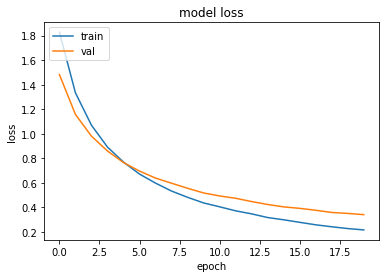

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('MobileNetV2_CKPLUS_model_loss.png')
!cp MobileNetV2_CKPLUS_model_loss.png "/content/drive/MyDrive/Datasets"
plt.show()

In [14]:
model.save("mobilenetv2_CKPLUS")

In [43]:
# saved_model_dir="mobilenetv2_CKPLUS"
# converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# tflite_quant_model = converter.convert()

# # Save the model.
# with open('mobilenetv2_CKPLUS.tflite', 'wb') as f:
#   f.write(tflite_quant_model)

Convert the model to tenserflow lite in .tflite

In [15]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model("mobilenetv2_CKPLUS") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('mobilenetv2_CKPLUS.tflite', 'wb') as f:
  f.write(tflite_model)

Save the .tflite to Drive

In [16]:
!cp mobilenetv2_CKPLUS.tflite "/content/drive/MyDrive/Datasets"

In [ ]:
os.listdir()

['.config',
 'mobilenetv2_CKPLUS.h5',
 'Cropped_CKPLUS',
 'drive',
 'CKPLUS',
 'sample_data']

Model InceptionV3
On CK+


In [34]:
base_model = keras.applications.InceptionV3(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(229, 229, 3),
    include_top=False,
    classifier_activation="softmax",
    classes=7
) 

base_model.trainable = False

# inputs = keras.Input(shape=(224, 224, 3))
inputs = keras.Input(shape=(229, 229, 3))

x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(7, activation="softmax")(x)

model = keras.Model(inputs, outputs)

In [35]:
path="/content/Cropped_CKPLUS/CK+48"

# dataset = keras.preprocessing.image_dataset_from_directory(path, image_size=(224, 224), label_mode="categorical")
train_dataset = keras.preprocessing.image_dataset_from_directory(path, image_size=(229, 229), label_mode="categorical", validation_split=0.3, subset="training", seed=42)
valid_dataset = keras.preprocessing.image_dataset_from_directory(path, image_size=(229, 229), label_mode="categorical", validation_split=0.3, subset="validation", seed=42)

model.compile(optimizer=keras.optimizers.Adam(),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
# model.fit(dataset, epochs=20, validation_split=0.2)
history = model.fit(train_dataset, epochs=50, validation_data=valid_dataset)


Found 981 files belonging to 7 classes.
Using 687 files for training.
Found 981 files belonging to 7 classes.
Using 294 files for validation.
Epoch 1/50
22/22 [==============================] - 9s 195ms/step - loss: 19.7910 - accuracy: 0.1965 - val_loss: 8.3674 - val_accuracy: 0.1633
Epoch 2/50
22/22 [==============================] - 3s 133ms/step - loss: 6.7883 - accuracy: 0.3071 - val_loss: 4.2032 - val_accuracy: 0.3231
Epoch 3/50
22/22 [==============================] - 3s 132ms/step - loss: 3.6756 - accuracy: 0.4047 - val_loss: 4.1450 - val_accuracy: 0.4694
Epoch 4/50
22/22 [==============================] - 3s 136ms/step - loss: 3.5201 - accuracy: 0.4381 - val_loss: 2.7121 - val_accuracy: 0.4762
Epoch 5/50
22/22 [==============================] - 3s 132ms/step - loss: 2.8151 - accuracy: 0.4934 - val_loss: 2.3448 - val_accuracy: 0.5374
Epoch 6/50
22/22 [==============================] - 3s 136ms/step - loss: 1.9597 - accuracy: 0.5560 - val_loss: 2.4972 - val_accuracy: 0.5068
Epoch

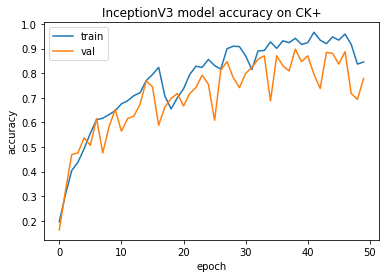

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('InceptionV3 model accuracy on CK+')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('InceptionV3_CKPLUS_model_accuracy.png')
!cp InceptionV3_CKPLUS_model_accuracy.png "/content/drive/MyDrive/Datasets"
plt.show()


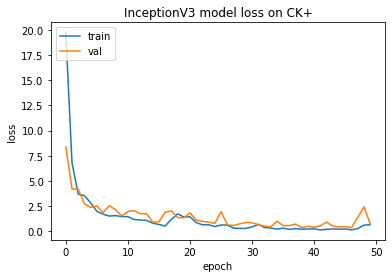

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('InceptionV3 model loss on CK+')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('InceptionV3_CKPLUS_model_loss.png')
!cp InceptionV3_CKPLUS_model_loss.png "/content/drive/MyDrive/Datasets"
plt.show()

In [38]:
#Save the Model 
model.save("InceptionV3_CKPLUS")

import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model("InceptionV3_CKPLUS") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model in the .tflite .
with open('InceptionV3_CKPLUS.tflite', 'wb') as f:
  f.write(tflite_model)

# copy the .tflite to Drive
!cp InceptionV3_CKPLUS.tflite "/content/drive/MyDrive/Datasets"

EfficientNetB7 with CK+ 

In [29]:
base_model = keras.applications.efficientnet.EfficientNetB7(
    weights = 'imagenet',  # Load weights pre-trained on ImageNet.
    input_shape = (224, 224, 3),
    include_top = False,
    classifier_activation = "softmax",
    classes = 7
) 

base_model.trainable = False

# inputs = keras.Input(shape=(224, 224, 3))
inputs = keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(7, activation="softmax")(x)

model = keras.Model(inputs, outputs)

258076736/258076736 [==============================] - 2s 0us/step


In [30]:
path="/content/Cropped_CKPLUS/CK+48"

# dataset = keras.preprocessing.image_dataset_from_directory(path, image_size=(224, 224), label_mode="categorical")
train_dataset = keras.preprocessing.image_dataset_from_directory(path, image_size=(224, 224), label_mode="categorical", validation_split=0.3, subset="training", seed=42)
valid_dataset = keras.preprocessing.image_dataset_from_directory(path, image_size=(224, 224), label_mode="categorical", validation_split=0.3, subset="validation", seed=42)

model.compile(optimizer=keras.optimizers.Adam(),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
# model.fit(dataset, epochs=20, validation_split=0.2)
history = model.fit(train_dataset, epochs=50, validation_data=valid_dataset)


Found 981 files belonging to 7 classes.
Using 687 files for training.
Found 981 files belonging to 7 classes.
Using 294 files for validation.
Epoch 1/50
22/22 [==============================] - 40s 833ms/step - loss: 1.5393 - accuracy: 0.4454 - val_loss: 1.1525 - val_accuracy: 0.6769
Epoch 2/50
22/22 [==============================] - 12s 516ms/step - loss: 1.0802 - accuracy: 0.6448 - val_loss: 0.9126 - val_accuracy: 0.7211
Epoch 3/50
22/22 [==============================] - 12s 521ms/step - loss: 0.8881 - accuracy: 0.7220 - val_loss: 0.8027 - val_accuracy: 0.7517
Epoch 4/50
22/22 [==============================] - 12s 525ms/step - loss: 0.7604 - accuracy: 0.7773 - val_loss: 0.7142 - val_accuracy: 0.7891
Epoch 5/50
22/22 [==============================] - 12s 534ms/step - loss: 0.6797 - accuracy: 0.8210 - val_loss: 0.6541 - val_accuracy: 0.8027
Epoch 6/50
22/22 [==============================] - 12s 535ms/step - loss: 0.6104 - accuracy: 0.8370 - val_loss: 0.6121 - val_accuracy: 0.8231


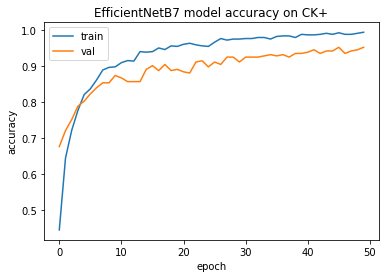

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('EfficientNetB7 model accuracy on CK+')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('EfficientNetB7_CKPLUS_model_accuracy.png')
!cp EfficientNetB7_CKPLUS_model_accuracy.png "/content/drive/MyDrive/Datasets"
plt.show()


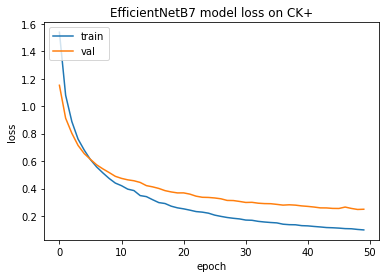

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('EfficientNetB7 model loss on CK+')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('EfficientNetB7_CKPLUS_model_loss.png')
!cp EfficientNetB7_CKPLUS_model_loss.png "/content/drive/MyDrive/Datasets"
plt.show()

In [33]:
#Save the Model 
model.save("EfficientNetB7_CKPLUS")

import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model("EfficientNetB7_CKPLUS") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model in the .tflite .
with open('EfficientNetB7_CKPLUS.tflite', 'wb') as f:
  f.write(tflite_model)

# copy the .tflite to Drive
!cp EfficientNetB7_CKPLUS.tflite "/content/drive/MyDrive/Datasets"

VGG16 with CK+

In [39]:
base_model = keras.applications.vgg16.VGG16(
    weights = 'imagenet',  # Load weights pre-trained on ImageNet.
    input_shape = (224, 224, 3),
    include_top = False,
    classifier_activation = "softmax",
    classes = 7
) 

base_model.trainable = False

# inputs = keras.Input(shape=(224, 224, 3))
inputs = keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(7, activation="softmax")(x)

model = keras.Model(inputs, outputs)

58889256/58889256 [==============================] - 0s 0us/step


In [40]:
path="/content/Cropped_CKPLUS/CK+48"

# dataset = keras.preprocessing.image_dataset_from_directory(path, image_size=(224, 224), label_mode="categorical")
train_dataset = keras.preprocessing.image_dataset_from_directory(path, image_size=(224, 224), label_mode="categorical", validation_split=0.3, subset="training", seed=42)
valid_dataset = keras.preprocessing.image_dataset_from_directory(path, image_size=(224, 224), label_mode="categorical", validation_split=0.3, subset="validation", seed=42)

model.compile(optimizer=keras.optimizers.Adam(),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
# model.fit(dataset, epochs=20, validation_split=0.2)
history = model.fit(train_dataset, epochs=20, validation_data=valid_dataset)


Found 981 files belonging to 7 classes.
Using 687 files for training.
Found 981 files belonging to 7 classes.
Using 294 files for validation.
Epoch 1/20
22/22 [==============================] - 12s 373ms/step - loss: 2.3600 - accuracy: 0.3668 - val_loss: 1.4919 - val_accuracy: 0.5136
Epoch 2/20
22/22 [==============================] - 6s 247ms/step - loss: 1.2746 - accuracy: 0.5633 - val_loss: 1.0441 - val_accuracy: 0.6463
Epoch 3/20
22/22 [==============================] - 6s 248ms/step - loss: 0.8656 - accuracy: 0.6929 - val_loss: 0.8036 - val_accuracy: 0.7007
Epoch 4/20
22/22 [==============================] - 6s 251ms/step - loss: 0.6264 - accuracy: 0.7700 - val_loss: 0.6664 - val_accuracy: 0.7585
Epoch 5/20
22/22 [==============================] - 6s 253ms/step - loss: 0.4938 - accuracy: 0.8341 - val_loss: 0.5609 - val_accuracy: 0.7687
Epoch 6/20
22/22 [==============================] - 6s 260ms/step - loss: 0.3977 - accuracy: 0.8748 - val_loss: 0.5110 - val_accuracy: 0.8027
Epoch

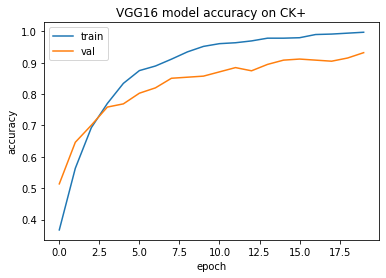

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('VGG16 model accuracy on CK+')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('VGG16_CKPLUS_model_accuracy.png')
!cp VGG16_CKPLUS_model_accuracy.png "/content/drive/MyDrive/Datasets"
plt.show()


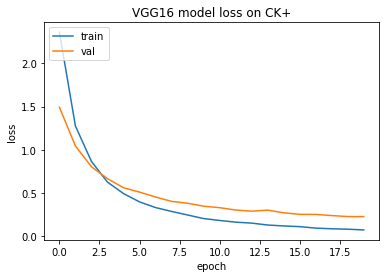

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('VGG16 model loss on CK+')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('VGG16_CKPLUS_model_loss.png')
!cp VGG16_CKPLUS_model_loss.png "/content/drive/MyDrive/Datasets"
plt.show()

In [43]:
#Save the Model 
model.save("VGG16_CKPLUS")

import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model("VGG16_CKPLUS") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model in the .tflite .
with open('VGG16_CKPLUS.tflite', 'wb') as f:
  f.write(tflite_model)

# copy the .tflite to Drive
!cp VGG16_CKPLUS.tflite "/content/drive/MyDrive/Datasets"

ResNet50 with CK+

In [46]:
base_model = keras.applications.resnet50.ResNet50(
    weights = 'imagenet',  # Load weights pre-trained on ImageNet.
    input_shape = (224, 224, 3),
    include_top = False,
    classifier_activation = "softmax",
    classes = 7
) 

base_model.trainable = False

# inputs = keras.Input(shape=(224, 224, 3))
inputs = keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(7, activation="softmax")(x)

model = keras.Model(inputs, outputs)

In [47]:
path="/content/Cropped_CKPLUS/CK+48"

# dataset = keras.preprocessing.image_dataset_from_directory(path, image_size=(224, 224), label_mode="categorical")
train_dataset = keras.preprocessing.image_dataset_from_directory(path, image_size=(224, 224), label_mode="categorical", validation_split=0.3, subset="training", seed=42)
valid_dataset = keras.preprocessing.image_dataset_from_directory(path, image_size=(224, 224), label_mode="categorical", validation_split=0.3, subset="validation", seed=42)

model.compile(optimizer=keras.optimizers.Adam(),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
# model.fit(dataset, epochs=20, validation_split=0.2)
history = model.fit(train_dataset, epochs=20, validation_data=valid_dataset)


Found 981 files belonging to 7 classes.
Using 687 files for training.
Found 981 files belonging to 7 classes.
Using 294 files for validation.
Epoch 1/20
22/22 [==============================] - 10s 250ms/step - loss: 1.6427 - accuracy: 0.4367 - val_loss: 1.2103 - val_accuracy: 0.6156
Epoch 2/20
22/22 [==============================] - 4s 161ms/step - loss: 1.0915 - accuracy: 0.6521 - val_loss: 0.9242 - val_accuracy: 0.7381
Epoch 3/20
22/22 [==============================] - 4s 161ms/step - loss: 0.8247 - accuracy: 0.7918 - val_loss: 0.7874 - val_accuracy: 0.7687
Epoch 4/20
22/22 [==============================] - 4s 158ms/step - loss: 0.6553 - accuracy: 0.8443 - val_loss: 0.6735 - val_accuracy: 0.8265
Epoch 5/20
22/22 [==============================] - 4s 161ms/step - loss: 0.5465 - accuracy: 0.8865 - val_loss: 0.5833 - val_accuracy: 0.8469
Epoch 6/20
22/22 [==============================] - 4s 160ms/step - loss: 0.4717 - accuracy: 0.9156 - val_loss: 0.5298 - val_accuracy: 0.8707
Epoch

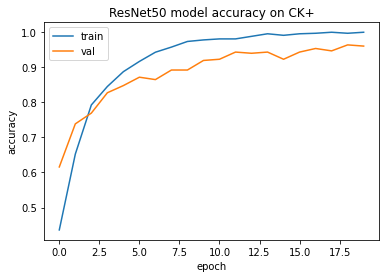

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ResNet50 model accuracy on CK+')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('ResNet50_CKPLUS_model_accuracy.png')
!cp ResNet50_CKPLUS_model_accuracy.png "/content/drive/MyDrive/Datasets"
plt.show()


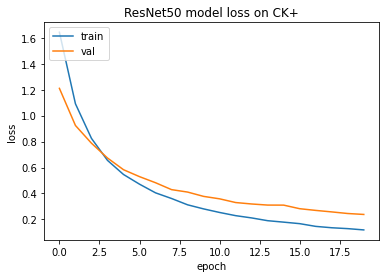

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ResNet50 model loss on CK+')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('ResNet50_CKPLUS_model_loss.png')
!cp ResNet50_CKPLUS_model_loss.png "/content/drive/MyDrive/Datasets"
plt.show()

In [50]:
#Save the Model 
model.save("ResNet50_CKPLUS")

import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model("ResNet50_CKPLUS") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model in the .tflite .
with open('ResNet50_CKPLUS.tflite', 'wb') as f:
  f.write(tflite_model)

# copy the .tflite to Drive
!cp ResNet50_CKPLUS.tflite "/content/drive/MyDrive/Datasets"